<a href="https://colab.research.google.com/github/teestar5/lesson00/blob/NeJron/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F_%D0%B3%D1%80%D0%B0%D1%84%D0%BE%D0%B2_1%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Теория графов

Для работы с графами в python мы будем использовать библиотеку NetworkX.

### Знакомство с библиотекой NetworkX

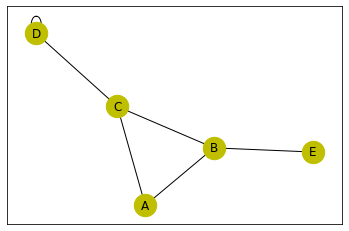

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# создаём объект графа
Graf = nx.Graph()

# определяем список узлов
nodes = ['A', 'B', 'C', 'D', 'E']

# определяем список рёбер
# каждое ребро записывается как кортеж соединяющих узлов
edges = [('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'E'), ('C', 'D'), ('D', 'D')]

# на основе созданных списков узлов и рёбер заполняем граф
Graf.add_nodes_from(nodes)
Graf.add_edges_from(edges)

# выводим граф на экран
nx.draw_networkx(Graf,
        with_labels=True, # вывод лейблов
        node_color='y',   # цвет узлов
        node_size=500)    # размер точек узлов
plt.show()

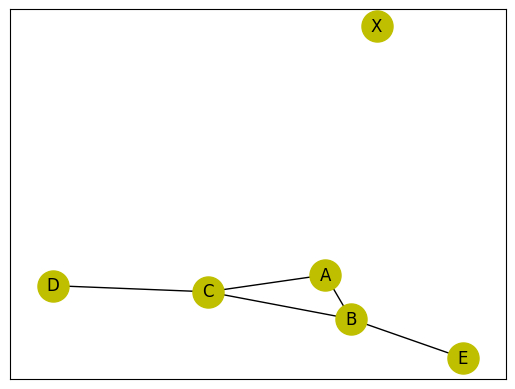

In [ ]:
# если нужно добавить вершину используем метод add_node()
Graf.add_node('X')

# посмотрим на результат
nx.draw_networkx(Graf,
        with_labels=True,
        node_color='y',
        node_size=500)
plt.show()

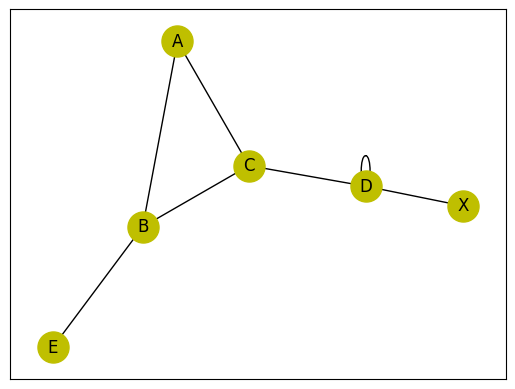

In [ ]:
# добавим ребро
Graf.add_edge('X', 'D')

# посмотрим на результат
nx.draw_networkx(Graf,
        with_labels=True,
        node_color='y',
        node_size=500)
plt.show()

Построим взвешенный граф. Вершинами будут города, а вес рёбер будет отражать расстояние между ними.

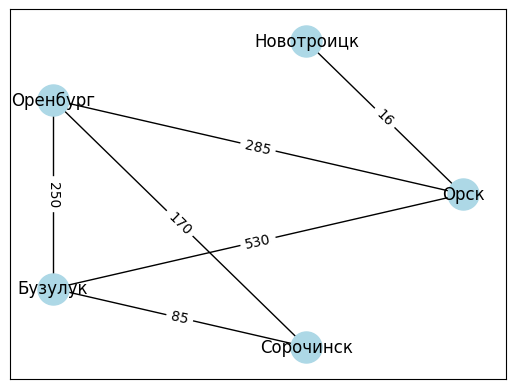

In [ ]:
# создаём объект графа
Graf = nx.Graph()

# определяем список узлов
nodes = ['Оренбург', 'Бузулук', 'Орск', 'Новотроицк', 'Сорочинск']

# определяем список рёбер с весами
kilometres = {('Оренбург', 'Орск', 285),
              ('Оренбург', 'Бузулук', 250),
              ('Орск', 'Новотроицк', 16),
              ('Оренбург', 'Сорочинск', 170),
              ('Орск', 'Бузулук', 530),
              ('Бузулук', 'Сорочинск', 85)}

# на основе созданных списков вершин и рёбер заполняем граф
# Graf.add_nodes_from(nodes)
Graf.add_weighted_edges_from(kilometres)

# задаём формат размещения элементов графа для визуализации
# pos = nx.spring_layout(Graf)
pos = nx.circular_layout(Graf)

# выбираем что будет в качестве лейблов (веса)
labels = nx.get_edge_attributes(Graf,'weight')

# выводим граф на экран
nx.draw_networkx(Graf,
        pos,
        with_labels=True,
        node_color='lightblue',
        node_size=500)

# добавляем отрисовку лейблов для рёбер
nx.draw_networkx_edge_labels(Graf, pos, edge_labels=labels)
plt.show()

### Построение кратчайшего маршрута

Определим кратчайший маршрут Орск - Сорочинск

In [ ]:
# определим кратчайший маршрут как список городов
shortest = nx.shortest_path(Graf, 'Орск', 'Сорочинск', weight='weight')

# определим общее расстояние данного маршрута
len_shortest = nx.shortest_path_length(Graf, 'Орск', 'Сорочинск', weight='weight')

print('Кратчайший маршрут', shortest)
print('Маршрут составляет', len_shortest, 'км')

Кратчайший маршрут ['Орск', 'Оренбург', 'Сорочинск']
Маршрут составляет 455 км


Раскрасим рёбра полученного маршрута красным цветом в отрисовке графа

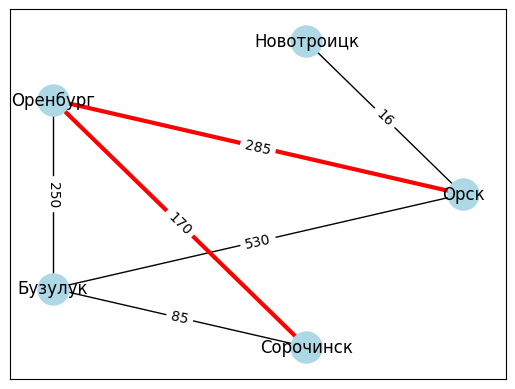

In [ ]:
# имея маршрут нужно получить список его рёбер
edges = [(a,b) for a,b in zip(shortest, shortest[1:])]

# выводим граф на экран
nx.draw_networkx(Graf,
        pos,
        with_labels=True,
        node_color='lightblue',
        node_size=500)

# рисуем кратчайший путь
nx.draw_networkx_edges(Graf, pos=pos, edgelist=edges, edge_color="r", width=3)

# добавляем отрисовку лейблов для рёбер
nx.draw_networkx_edge_labels(Graf, pos, edge_labels=labels)

plt.show()


### Задача коммивояжера

In [ ]:
# задача коммивояжера имеет разные особенности, поэтому подход к
# её решению реализован в нескольких функциях библиотеки в разделе
# traveling_salesman
from networkx.algorithms.approximation.traveling_salesman import traveling_salesman_problem

# найдём кратчайший путь в Graf, соединяющий указанные узлы nodes
traveling_salesman_problem(Graf,
                           weight='weight',
                           nodes=['Оренбург', 'Бузулук', 'Сорочинск'],
                           cycle=False) # цикличный маршрут

['Бузулук', 'Сорочинск', 'Оренбург']

### Анализ датасета "Песнь льда и пламени"

Теперь будем работать с данными сформированными по книге "Песнь льда и пламени". Данные содержат имена всех действующих лиц (узлы) и их взаимодействия по сюжету книги (рёбра), причём факт взаимодействия считался только тогда, когда имена 2 героев находились в тексте на расстоянии не более 15 слов.

In [ ]:
import pandas as pd

# загрузим датасет и выведем на экран
data = pd.read_csv('GameOfThrones.csv')
data

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1
...,...,...,...,...,...
679,Tyrion-Lannister,Willis-Wode,Undirected,4,1
680,Tyrion-Lannister,Yoren,Undirected,10,1
681,Tywin-Lannister,Varys,Undirected,4,1
682,Tywin-Lannister,Walder-Frey,Undirected,8,1


Нас интересуют только столбцы **Source**, **Target** и **weight**.

In [ ]:
del data['Type']
del data['book']

In [ ]:
data

,Source,Target,weight
0,Addam-Marbrand,Jaime-Lannister,3
1,Addam-Marbrand,Tywin-Lannister,6
2,Aegon-I-Targaryen,Daenerys-Targaryen,5
3,Aegon-I-Targaryen,Eddard-Stark,4
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,4
...,...,...,...
679,Tyrion-Lannister,Willis-Wode,4
680,Tyrion-Lannister,Yoren,10
681,Tywin-Lannister,Varys,4
682,Tywin-Lannister,Walder-Frey,8


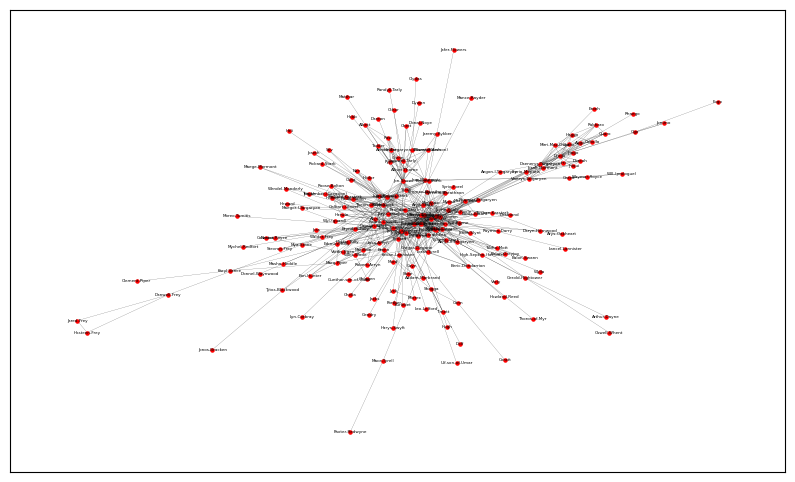

In [ ]:
# создадим граф и заполним его данными нашего датасета
Graf = nx.from_pandas_edgelist(data, 'Source', 'Target', ['weight'])

# задаём формат размещения элементов графа для визуализации
pos = nx.spring_layout(Graf)
# pos = nx.circular_layout(Graf)

# выбираем что будет в качестве лейблов (веса)
labels = nx.get_edge_attributes(Graf,'weight')

# задаём размер полотна
plt.figure(figsize=(10,6))

# выводим граф на экран
nx.draw_networkx(Graf,
        pos,
        with_labels=True,
        node_color='red',
        node_size=5,       # размер метки узла
        width=0.1,         # толщина линии ребра
        font_size=3)       # размер шрифта лейблов

# добавляем отрисовку лейблов для рёбер
# nx.draw_networkx_edge_labels(Graf, pos)
plt.show()

#### Визуализация в PyVis (работает только в jupyter notebook)

Имея много данных, для визуализации графа лучше использовать интерактивный вариант отрисовки. Поэтому построим визуализацию при помощи библиотеки PyVis.

In [ ]:
pip install pyvis

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from pyvis.network import Network

# создаем экземпляр сети
nt = Network('500px', '100%', notebook=True)

# задаём более плавную графитационную модель
nt.barnes_hut()

# переводим граф в формат PyVis
nt.from_nx(Graf)

# выводим на экран
nt.show('nx.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


### PageRank

**PageRank** вычисляет ранжирование узлов графа G на основе структуры входящих ссылок. Первоначально он был разработан как алгоритм ранжирования веб-страниц.

In [ ]:
from pprint import pprint

# посчитаем рейтинг всех вершин
pageranks = nx.pagerank(Graf)
pprint(pageranks)

{'Addam-Marbrand': 0.001835877787022901,
 'Aegon-I-Targaryen': 0.001983185143498655,
 'Aemon-Targaryen-(Maester-Aemon)': 0.006146462866260707,
 'Aerys-II-Targaryen': 0.004506792557993859,
 'Aggo': 0.004654740259612506,
 'Albett': 0.0027600980398085743,
 'Alliser-Thorne': 0.0074084922415613135,
 'Alyn': 0.0036273134017809528,
 'Arthur-Dayne': 0.0017338954103765635,
 'Arya-Stark': 0.01563046610089053,
 'Arys-Oakheart': 0.001285828848484212,
 'Balon-Greyjoy': 0.0018950208944209421,
 'Balon-Swann': 0.0017873479442514781,
 'Barristan-Selmy': 0.007864678204680646,
 'Benjen-Stark': 0.009955836377674766,
 'Beric-Dondarrion': 0.004691441639404277,
 'Boros-Blount': 0.0032361011412914715,
 'Bowen-Marsh': 0.004081352049596794,
 'Bran-Stark': 0.019940543257472354,
 'Brandon-Stark': 0.00448555421240931,
 'Bronn': 0.007753349263674168,
 'Brynden-Tully': 0.007472467216207201,
 'Catelyn-Stark': 0.030189729639356143,
 'Cayn': 0.002444978044949594,
 'Cersei-Lannister': 0.017074603349338583,
 'Chella': 0.

In [ ]:
import operator

# отсортируем в порядке убывания
sorted_pagerank = sorted(pageranks.items(), key=operator.itemgetter(1), reverse = True)
pprint(sorted_pagerank)

[('Eddard-Stark', 0.04550213151218522),
 ('Tyrion-Lannister', 0.03301449867019286),
 ('Catelyn-Stark', 0.030189729639356143),
 ('Robert-Baratheon', 0.02982527420823678),
 ('Jon-Snow', 0.026840579868198603),
 ('Robb-Stark', 0.02155918676623074),
 ('Sansa-Stark', 0.019998050283349653),
 ('Bran-Stark', 0.019940543257472354),
 ('Jaime-Lannister', 0.017500555351025744),
 ('Cersei-Lannister', 0.017074603349338583),
 ('Joffrey-Baratheon', 0.01670899306736672),
 ('Arya-Stark', 0.01563046610089053),
 ('Daenerys-Targaryen', 0.014701537894983106),
 ('Drogo', 0.014577570817423068),
 ('Petyr-Baelish', 0.014547460136670015),
 ('Tywin-Lannister', 0.013481467702237335),
 ('Jory-Cassel', 0.012592509839582355),
 ('Luwin', 0.01151267695707219),
 ('Rodrik-Cassel', 0.010889492644444264),
 ('Renly-Baratheon', 0.010403576308576825),
 ('Lysa-Arryn', 0.010303534930150154),
 ('Benjen-Stark', 0.009955836377674766),
 ('Varys', 0.009626263794586486),
 ('Jeor-Mormont', 0.009551831191150788),
 ('Theon-Greyjoy', 0.00

In [ ]:
import numpy as np

# top5
top5 = np.array(sorted_pagerank[:5])[:,0]

In [ ]:
from pyvis.network import Network

# создаем экземпляр сети
nt = Network('500px', '100%', notebook=True)

# задаём более плавную графитационную модель
nt.barnes_hut()

# вытащим данные из датафрейма
sources = data['Source']
targets = data['Target']
weights = data['weight']
edge_data = zip(sources, targets, weights)

# добавление узлов
for e in list(pageranks.keys()):

    # перекрасим и увеличим интересующие нас узлы
    color_node='#252585'
    size_node=pageranks[e]*3000

    # добавление каждого узла
    nt.add_node(e, e, title=e, color=color_node, size=size_node)

# добавление рёбер
for edge in edge_data:
    src = edge[0]
    dst = edge[1]
    w = edge[2]

    # добавление каждого ребра
    nt.add_edge(src, dst, value=w, color='blue')

# выводим на экран
nt.show('nx.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


### Центральность вершин

Центральность вершин чаще всего используется для анализа социальных сетей и имеет разные метрики. Вот некоторые из них:
        
**Betweenness centrality** - характеризует, насколько важную роль данный узел играет на пути между другими узлами.
        
**Degree centrality** - показывает, кто является наиболее активным узлом в сети. Измеряется количеством связей с другими узлами в сети.
        
**Closeness centrality** - выражает, насколько близко узел расположен к остальным узлам сети. Closeness centrality является показателем того, насколько быстро распространяется информация в сети от одного участника к остальным, то есть насколько близок рассматриваемый участник ко всем остальным участникам сети.

Betweenness centrality

In [ ]:
# betweenness centrality
betweenness = nx.betweenness_centrality(Graf, k=10, endpoints=True)

# создаем экземпляр сети
nt = Network('500px', '100%', notebook=True)

# задаём более плавную графитационную модель
nt.barnes_hut()

# вытащим данные из датафрейма
sources = data['Source']
targets = data['Target']
weights = data['weight']
edge_data = zip(sources, targets, weights)

# добавление узлов
for e in list(betweenness.keys()):

    # перекрасим и увеличим интересующие нас узлы
    color_node='#b688b0'
    size_node=betweenness[e]*3000

    # добавление каждого узла
    nt.add_node(e, e, title=e, color=color_node, size=size_node)

# добавление рёбер
for edge in edge_data:
    src = edge[0]
    dst = edge[1]
    w = edge[2]

    # добавление каждого ребра
    nt.add_edge(src, dst, value=w, color='#759fff')

# выводим на экран
nt.show('nx.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


Degree centrality

In [ ]:
# degree centrality
degree = nx.degree_centrality(Graf)

# создаем экземпляр сети
nt = Network('500px', '100%', notebook=True)

# задаём более плавную графитационную модель
nt.barnes_hut()

# вытащим данные из датафрейма
sources = data['Source']
targets = data['Target']
weights = data['weight']
edge_data = zip(sources, targets, weights)

# добавление узлов
for e in list(degree.keys()):

    # перекрасим и увеличим интересующие нас узлы
    color_node='#30ab98'
    size_node=degree[e]*3000

    # добавление каждого узла
    nt.add_node(e, e, title=e, color=color_node, size=size_node)

# добавление рёбер
for edge in edge_data:
    src = edge[0]
    dst = edge[1]
    w = edge[2]

    # добавление каждого ребра
    nt.add_edge(src, dst, value=w, color='#759fff')

# выводим на экран
nt.show('nx.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


Closeness centrality

In [ ]:
# closeness centrality
closeness = nx.closeness_centrality(Graf)

# создаем экземпляр сети
nt = Network('500px', '100%', notebook=True)

# задаём более плавную графитационную модель
nt.barnes_hut()

# вытащим данные из датафрейма
sources = data['Source']
targets = data['Target']
weights = data['weight']
edge_data = zip(sources, targets, weights)

# добавление узлов
for e in list(closeness.keys()):

    # перекрасим и увеличим интересующие нас узлы
    color_node='#83b03c'
    size_node=closeness[e]*500

    # добавление каждого узла
    nt.add_node(e, e, title=e, color=color_node, size=size_node)

# добавление рёбер
for edge in edge_data:
    src = edge[0]
    dst = edge[1]
    w = edge[2]

    # добавление каждого ребра
    nt.add_edge(src, dst, value=w, color='#759fff')

# выводим на экран
nt.show('nx.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


### OSMnx
Пакет Python для извлечения, моделирования, анализа и визуализации уличных сетей из OpenStreetMap.

In [ ]:
pip install osmnx

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


**Сделайте перезапуск ядра после установки библиотеки**

#### Способы загрузки графа

In [ ]:
import osmnx as ox

# 1 способ
# создаём граф по адресу
G1 = ox.graph_from_address(
    address="350 5th Ave, New York, NY", # адрес геокодирование
    dist=1000,                           # сохранить узлы в пределах этого количества метров от центра графа
    dist_type="network",                 # "network" или "bbox"
    network_type="drive")                # "all_private", "all", "bike", "drive", "drive_service", "walk" - тип уличной сети

In [ ]:
# 2 способ
# определяем ограничивающую рамку в Сан-Франциско
north, south, east, west = 37.79, 37.78, -122.41, -122.43

# создаём граф по этой ограничивающей рамке
G2 = ox.graph_from_bbox(north,
                        south,
                        east,
                        west,
                        network_type="drive_service")

In [ ]:
# 3 способ
# создаём граф по месту (страна, город)
G3 = ox.graph_from_place("Piedmont, California, USA",
                         network_type="drive")

In [ ]:
# 4 способ
# создаём граф вокруг некоторой (широта, долгота) точки
location_point = (33.299896, -111.831638)
G4 = ox.graph_from_point(location_point,
                        network_type="drive_service",
                        dist=500,
                        simplify=False) # если True, упростит топологию графа с помощью функции SimpliP_Graph

#### Отрисовка графа

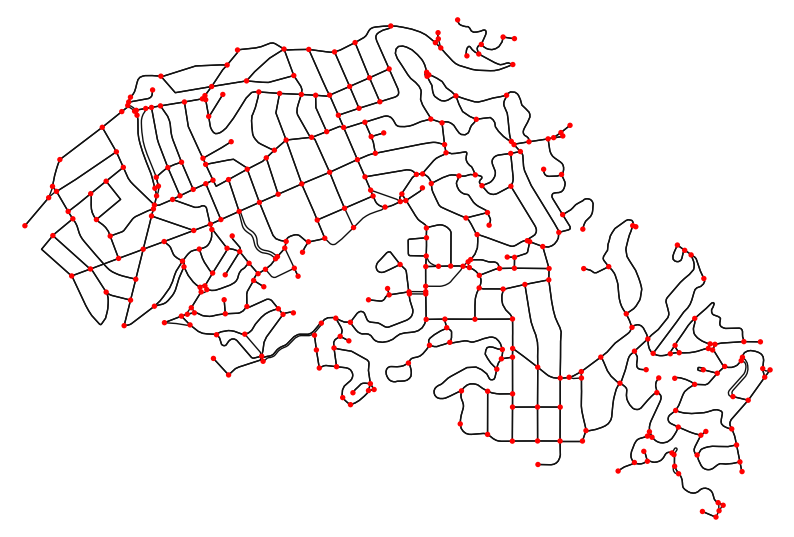

In [ ]:
fig, ax = ox.plot_graph(G3,         # граф
              figsize=(10, 10),     # размер полотна
              bgcolor='#ffffff',    # цвет фона
              node_color='red',     # цвет узлов
              node_size=15,         # размер узлов
              edge_color='#111111', # цвет ребер
              edge_linewidth=1)     # толщина ребер

#### Отрисовка строений

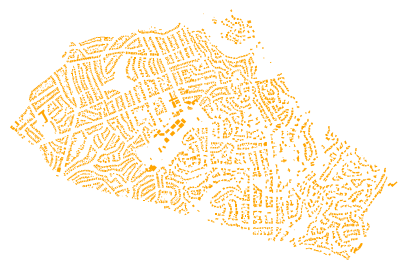

In [ ]:
# задаем параметры
place = "Piedmont, California, USA"
tags = {"building": True}
gdf = ox.geometries_from_place(place, tags)

# отрисовка зданий выбранного района
fig, ax = ox.plot_footprints(gdf,
                   figsize=(5, 5),
                   color='orange',
                   bgcolor='#ffffff')

#### Визуализация closeness centrality в качестве градиента

In [ ]:
# центральность считаем при помощи библиотеки NetworkX
edge_centrality = nx.closeness_centrality(nx.line_graph(G3))
nx.set_edge_attributes(G3, edge_centrality, "edge_centrality")

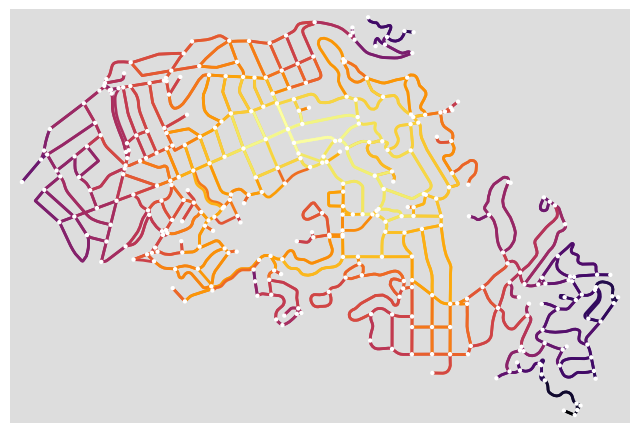

In [ ]:
# добавим цветовую палитру "inferno" для отрисовки ребер
ec = ox.plot.get_edge_colors_by_attr(G3, "edge_centrality", cmap="inferno")

# выведем результат на экран
fig, ax = ox.plot_graph(G3,
              edge_color=ec,
              edge_linewidth=2,
              node_size=10,
              bgcolor='#dddddd')

#### Построние кратчайшего маршрута **по расстоянию**

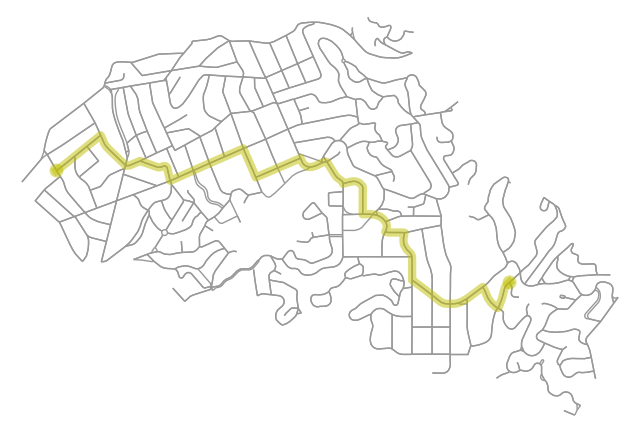

In [ ]:
# выбираем 2 узла
orig = list(G3)[1]
dest = list(G3)[120]

# рассчитываем кратчайший маршрут между ними
route = ox.shortest_path(G3,
                         orig,
                         dest,
                         weight="length")

# выводим результат на экран
fig, ax = ox.plot_graph_route(G3,
                              route,             # маршрут
                              route_color="y",   # цвет линии маршрута
                              route_linewidth=6, # толщина линии маршрута
                              node_size=0,
                              bgcolor='#ffffff')

#### Построние кратчайшего маршрута **по времени**

Функция add_edge_speeds() добавляет граничные скорости для каждого ребра на основе типа шоссе (не всегда совпадает с реальностью).

In [ ]:
# получаем значения скоростей
G = ox.add_edge_speeds(G3)

# переведем расстояние и скорость в время затраченное на данный маршрут
G = ox.add_edge_travel_times(G)

In [ ]:
# рассчитываем кратчайший маршрут по времени
route2 = ox.shortest_path(G, orig, dest, weight="travel_time")

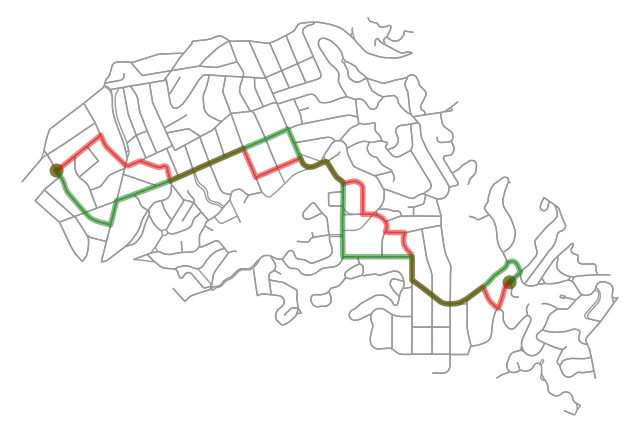

In [ ]:
# выводим на экран оба маршрута
fig, ax = ox.plot_graph_routes(G,
                     routes=[route, route2],
                     route_colors=["r", "g"],
                     route_linewidth=6,
                     node_size=0,
                     bgcolor='#ffffff')